In [1]:
%%time
import numpy as np
import pandas as pd
import math  
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import stats



CPU times: total: 4.77 s
Wall time: 37 s


In [2]:
no_of_experiments = 10000000
num_bins = 100

tasks = {
    "Task 1": [4,7, 12],
}

data = pd.DataFrame(tasks, index=["optimistic", "likely", 
                                  "pessimistic"])
points = [0] * no_of_experiments

for column in data:
    a, b, c = data[column][0], data[column][1], data[column][2]
    alpha = ((4*b) + c - (5*a))/(c - a)
    beta = ((5*c) - a - (4*b))/(c - a)
    r = np.random.beta(alpha, beta, no_of_experiments)
    p = (r*(c-a)) + a
    points += p



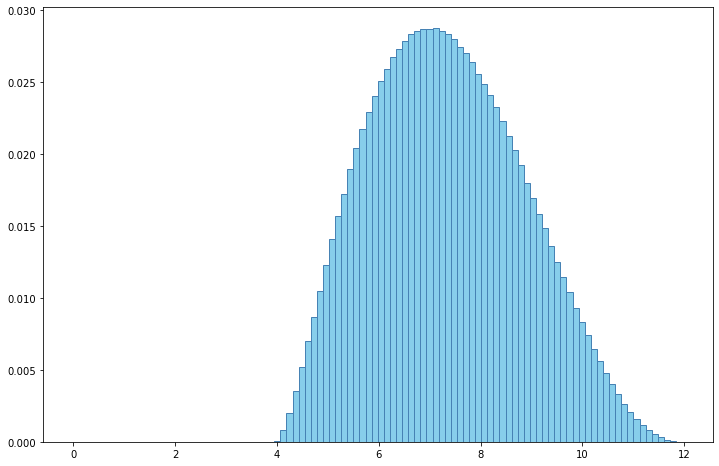

In [3]:
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(points, num_bins, 
                            range = (0, np.max(points)),
                            color = "skyblue", lw=1, 
                            edgecolor="steelblue", 
                            weights=[1/no_of_experiments]*
                            no_of_experiments)
plt.show() 

In [4]:
_, minmax, mean, var, skewness, kurtosis = stats.describe(points)
sd = math.sqrt(var)

print("Tasks")
print("-----")
data["Total"] = data.sum(axis=1).values
print(data.T)
print()

print("Statistics")
print("----------")
print("minimum:", "%.1f" % minmax[0], "maximum:", 
      "%.1f" % minmax[1])
print("mean:", "%.1f" %  mean)
print("standard deviation:", "%.1f" % sd)
print("skewness:", "%.2f" % skewness)
print("kurtosis:", "%.2f" % kurtosis)
print()

# prints out the probability
def print_probability(bins, mean, sd, experiments, fraction):
    upper = len(np.where(bins <= mean + sd)[0])
    lower = len(np.where(bins <= mean - sd)[0])
    prob = (np.sum(n[:upper])-np.sum(n[:lower]))*100
    print("* between", "%.1f" % (mean-sd/2), "and", 
          "%.1f" % (mean+sd/2), ":", "%.1f%%" % prob, 
          "(within %sσ)" % fraction)

print("Probabilities")
print("-------------")
print_probability(bins, mean, sd/2, no_of_experiments, "0.5")
print_probability(bins, mean, sd, no_of_experiments, "1")
print_probability(bins, mean, 2*sd, no_of_experiments, "2")
print_probability(bins, mean, 3*sd, no_of_experiments, "3")

Tasks
-----
        optimistic  likely  pessimistic
Task 1           4       7           12
Total            4       7           12

Statistics
----------
minimum: 4.0 maximum: 12.0
mean: 7.3
standard deviation: 1.5
skewness: 0.22
kurtosis: -0.60

Probabilities
-------------
* between 7.0 and 7.7 : 33.1% (within 0.5σ)
* between 6.6 and 8.1 : 64.7% (within 1σ)
* between 5.8 and 8.8 : 97.2% (within 2σ)
* between 5.1 and 9.6 : 100.0% (within 3σ)
